In [1]:
import scirpy as ir
import scanpy as sc
from glob import glob
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

sc.set_figure_params(dpi=100, color_map = 'viridis_r', transparent=False, frameon=False, figsize=(4, 4))
%config InlineBackend.figure_format = 'retina'
sc.settings.verbosity = 2  # verbosity: errors (0), warnings (1), info (2), hints (3)

# matplot 输出的图片为illustrator可编辑的字体
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Import data

In [2]:
# import TCR data

P1_crisis = ir.io.read_10x_vdj("./data/Huan_filtered_vdj/[P1_crisis] filtered_contig_annotations.csv") 
P1_after = ir.io.read_10x_vdj("./data/Huan_filtered_vdj/[P1_after] filtered_contig_annotations.csv") 

P2_crisis = ir.io.read_10x_vdj('./data/Huan_filtered_vdj/[P2_crisis] filtered_contig_annotations.csv')
P2_after = ir.io.read_10x_vdj('./data/Huan_filtered_vdj/[P2_after] filtered_contig_annotations.csv')

# donor 1 = cai, 2 tian, 3 zhu

P1_after.obs['Phenotype']="After_crisis"
P1_after.obs['donor_id']="patient_1"
P1_crisis.obs['Phenotype']="Crisis"
P1_crisis.obs['donor_id']="patient_1"

P2_after.obs['Phenotype']="After_crisis"
P2_after.obs['donor_id']="patient_2"
P2_crisis.obs['Phenotype']="Crisis"
P2_crisis.obs['donor_id']="patient_2"


# merge into one object.
adata_MC_TCR = P1_crisis.concatenate(P1_after, P2_crisis, P2_after)
adata_MC_TCR

c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\scirpy\io\_convert_anndata.py:81: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(obs=ir_df, X=np.empty([ir_df.shape[0], 0]))
c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\scirpy\io\_convert_anndata.py:81: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(obs=ir_df, X=np.empty([ir_df.shape[0], 0]))
c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\scirpy\io\_convert_anndata.py:81: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion

AnnData object with n_obs × n_vars = 10674 × 0
    obs: 'is_cell', 'high_confidence', 'multi_chain', 'extra_chains', 'IR_VJ_1_c_call', 'IR_VJ_2_c_call', 'IR_VDJ_1_c_call', 'IR_VDJ_2_c_call', 'IR_VJ_1_consensus_count', 'IR_VJ_2_consensus_count', 'IR_VDJ_1_consensus_count', 'IR_VDJ_2_consensus_count', 'IR_VJ_1_d_call', 'IR_VJ_2_d_call', 'IR_VDJ_1_d_call', 'IR_VDJ_2_d_call', 'IR_VJ_1_duplicate_count', 'IR_VJ_2_duplicate_count', 'IR_VDJ_1_duplicate_count', 'IR_VDJ_2_duplicate_count', 'IR_VJ_1_j_call', 'IR_VJ_2_j_call', 'IR_VDJ_1_j_call', 'IR_VDJ_2_j_call', 'IR_VJ_1_junction', 'IR_VJ_2_junction', 'IR_VDJ_1_junction', 'IR_VDJ_2_junction', 'IR_VJ_1_junction_aa', 'IR_VJ_2_junction_aa', 'IR_VDJ_1_junction_aa', 'IR_VDJ_2_junction_aa', 'IR_VJ_1_locus', 'IR_VJ_2_locus', 'IR_VDJ_1_locus', 'IR_VDJ_2_locus', 'IR_VJ_1_productive', 'IR_VJ_2_productive', 'IR_VDJ_1_productive', 'IR_VDJ_2_productive', 'IR_VJ_1_v_call', 'IR_VJ_2_v_call', 'IR_VDJ_1_v_call', 'IR_VDJ_2_v_call', 'has_ir', 'Phenotype', 'donor_i

In [3]:
adata_MC_TCR.obs = adata_MC_TCR.obs.reset_index()
adata_MC_TCR.obs.index = adata_MC_TCR.obs.cell_id.tolist()
adata_MC_TCR.obs

,cell_id,is_cell,high_confidence,multi_chain,extra_chains,IR_VJ_1_c_call,IR_VJ_2_c_call,IR_VDJ_1_c_call,IR_VDJ_2_c_call,IR_VJ_1_consensus_count,...,IR_VDJ_1_productive,IR_VDJ_2_productive,IR_VJ_1_v_call,IR_VJ_2_v_call,IR_VDJ_1_v_call,IR_VDJ_2_v_call,has_ir,Phenotype,donor_id,batch
AAACCTGTCCCAAGTA-1-0,AAACCTGTCCCAAGTA-1-0,True,True,False,[],TRAC,NaN,TRBC2,NaN,896.0,...,True,None,TRAV13-1,NaN,TRBV5-1,NaN,True,Crisis,patient_1,0
AAACGGGAGGCCGAAT-1-0,AAACGGGAGGCCGAAT-1-0,True,True,False,[],TRAC,NaN,TRBC1,NaN,3302.0,...,True,None,TRAV26-1,NaN,TRBV11-2,NaN,True,Crisis,patient_1,0
AAACGGGAGTCAATAG-1-0,AAACGGGAGTCAATAG-1-0,True,True,False,[],TRAC,NaN,TRBC2,NaN,1948.0,...,True,None,TRAV3,NaN,TRBV7-9,NaN,True,Crisis,patient_1,0
AAACGGGGTGTTCTTT-1-0,AAACGGGGTGTTCTTT-1-0,True,True,False,[],TRAC,NaN,TRBC2,NaN,6152.0,...,True,None,TRAV14/DV4,NaN,TRBV4-3,NaN,True,Crisis,patient_1,0
AAACGGGTCTCAAACG-1-0,AAACGGGTCTCAAACG-1-0,True,True,False,[],NaN,NaN,TRBC2,NaN,NaN,...,True,None,NaN,NaN,TRBV24-1,NaN,True,Crisis,patient_1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAAGGTGGGTT-1-3,TTTGTCAAGGTGGGTT-1-3,True,True,False,[],TRAC,NaN,TRBC2,NaN,4810.0,...,True,None,TRAV16,NaN,TRBV9,NaN,True,After_crisis,patient_2,3
TTTGTCACAAGAAGAG-1-3,TTTGTCACAAGAAGAG-1-3,True,True,False,[],TRAC,NaN,TRBC2,NaN,12662.0,...,True,None,TRAV16,NaN,TRBV7-3,NaN,True,After_crisis,patient_2,3
TTTGTCACATTGAGCT-1-3,TTTGTCACATTGAGCT-1-3,True,True,False,[],NaN,NaN,TRBC1,NaN,NaN,...,True,None,NaN,NaN,TRBV15,NaN,True,After_crisis,patient_2,3
TTTGTCAGTTATCCGA-1-3,TTTGTCAGTTATCCGA-1-3,True,True,False,[],TRAC,NaN,TRBC2,NaN,9678.0,...,True,None,TRAV13-1,NaN,TRBV18,NaN,True,After_crisis,patient_2,3


In [4]:
# Remove obs middle character

test = 'AAACCTGTCGGAATCT-1-0'

def remove_middle_character(s):
    s1 = s[:-3]
    s2 = s[-1]
    return s1+s2

remove_middle_character(test)


adata_MC_TCR.obs.index = adata_MC_TCR.obs.index.map(remove_middle_character)
adata_MC_TCR.obs = adata_MC_TCR.obs.drop('cell_id', axis=1)

adata_MC_TCR.obs

,is_cell,high_confidence,multi_chain,extra_chains,IR_VJ_1_c_call,IR_VJ_2_c_call,IR_VDJ_1_c_call,IR_VDJ_2_c_call,IR_VJ_1_consensus_count,IR_VJ_2_consensus_count,...,IR_VDJ_1_productive,IR_VDJ_2_productive,IR_VJ_1_v_call,IR_VJ_2_v_call,IR_VDJ_1_v_call,IR_VDJ_2_v_call,has_ir,Phenotype,donor_id,batch
AAACCTGTCCCAAGTA-0,True,True,False,[],TRAC,NaN,TRBC2,NaN,896.0,NaN,...,True,None,TRAV13-1,NaN,TRBV5-1,NaN,True,Crisis,patient_1,0
AAACGGGAGGCCGAAT-0,True,True,False,[],TRAC,NaN,TRBC1,NaN,3302.0,NaN,...,True,None,TRAV26-1,NaN,TRBV11-2,NaN,True,Crisis,patient_1,0
AAACGGGAGTCAATAG-0,True,True,False,[],TRAC,NaN,TRBC2,NaN,1948.0,NaN,...,True,None,TRAV3,NaN,TRBV7-9,NaN,True,Crisis,patient_1,0
AAACGGGGTGTTCTTT-0,True,True,False,[],TRAC,NaN,TRBC2,NaN,6152.0,NaN,...,True,None,TRAV14/DV4,NaN,TRBV4-3,NaN,True,Crisis,patient_1,0
AAACGGGTCTCAAACG-0,True,True,False,[],NaN,NaN,TRBC2,NaN,NaN,NaN,...,True,None,NaN,NaN,TRBV24-1,NaN,True,Crisis,patient_1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAAGGTGGGTT-3,True,True,False,[],TRAC,NaN,TRBC2,NaN,4810.0,NaN,...,True,None,TRAV16,NaN,TRBV9,NaN,True,After_crisis,patient_2,3
TTTGTCACAAGAAGAG-3,True,True,False,[],TRAC,NaN,TRBC2,NaN,12662.0,NaN,...,True,None,TRAV16,NaN,TRBV7-3,NaN,True,After_crisis,patient_2,3
TTTGTCACATTGAGCT-3,True,True,False,[],NaN,NaN,TRBC1,NaN,NaN,NaN,...,True,None,NaN,NaN,TRBV15,NaN,True,After_crisis,patient_2,3
TTTGTCAGTTATCCGA-3,True,True,False,[],TRAC,NaN,TRBC2,NaN,9678.0,NaN,...,True,None,TRAV13-1,NaN,TRBV18,NaN,True,After_crisis,patient_2,3


In [5]:
adata_MC = sc.read('./write/MC_leiden.h5ad')
adata_MC.uns['log1p']["base"] = None
adata_MC

adata_MC_T = adata_MC[adata_MC.obs['Major_category'] == 'T']
subcell_annotator_T = adata_MC_T.obs[['Minor_cluster']]
subcell_annotator_T

,Minor_cluster
AAACCTGAGTGTGAAT-0,CD8 Tem
AAACCTGGTTGTACAC-0,CD8 Tem
AAACCTGTCAGCGATT-0,CD4 Temra (Th1)
AAACCTGTCCAATGGT-0,CD8 Tem
AAACCTGTCCCAAGTA-0,CD4 Tcm (Th0)
...,...
TTTGTCAAGAAGATTC-3,CD4 Tcm (Th0)
TTTGTCAAGGTGGGTT-3,CD8 Tem
TTTGTCACAAGAAGAG-3,Activated Treg
TTTGTCAGTTATCCGA-3,CD4 Tcm (Th0)


In [6]:
adata_MC_TCR.obs['Minor_cluster'] = np.nan
adata_MC_TCR.obs['Minor_cluster'] =  adata_MC_TCR.obs['Minor_cluster'].combine_first(subcell_annotator_T['Minor_cluster'])
adata_MC_TCR = adata_MC_TCR[adata_MC_TCR.obs['Minor_cluster'].notna()]
adata_MC_TCR.obs

,is_cell,high_confidence,multi_chain,extra_chains,IR_VJ_1_c_call,IR_VJ_2_c_call,IR_VDJ_1_c_call,IR_VDJ_2_c_call,IR_VJ_1_consensus_count,IR_VJ_2_consensus_count,...,IR_VDJ_2_productive,IR_VJ_1_v_call,IR_VJ_2_v_call,IR_VDJ_1_v_call,IR_VDJ_2_v_call,has_ir,Phenotype,donor_id,batch,Minor_cluster
AAACCTGTCCCAAGTA-0,True,True,False,[],TRAC,NaN,TRBC2,NaN,896.0,NaN,...,None,TRAV13-1,NaN,TRBV5-1,NaN,True,Crisis,patient_1,0,CD4 Tcm (Th0)
AAACGGGAGGCCGAAT-0,True,True,False,[],TRAC,NaN,TRBC1,NaN,3302.0,NaN,...,None,TRAV26-1,NaN,TRBV11-2,NaN,True,Crisis,patient_1,0,CD4 Tcm (Th17)
AAACGGGAGTCAATAG-0,True,True,False,[],TRAC,NaN,TRBC2,NaN,1948.0,NaN,...,None,TRAV3,NaN,TRBV7-9,NaN,True,Crisis,patient_1,0,Activated Treg
AAACGGGGTGTTCTTT-0,True,True,False,[],TRAC,NaN,TRBC2,NaN,6152.0,NaN,...,None,TRAV14/DV4,NaN,TRBV4-3,NaN,True,Crisis,patient_1,0,CD4 Temra (Th1)
AAACGGGTCTCAAACG-0,True,True,False,[],NaN,NaN,TRBC2,NaN,NaN,NaN,...,None,NaN,NaN,TRBV24-1,NaN,True,Crisis,patient_1,0,CD4 Tnaive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAAGAAGATTC-3,True,True,False,[],TRAC,NaN,NaN,NaN,4380.0,NaN,...,None,TRAV1-1,NaN,NaN,NaN,True,After_crisis,patient_2,3,CD4 Tcm (Th0)
TTTGTCAAGGTGGGTT-3,True,True,False,[],TRAC,NaN,TRBC2,NaN,4810.0,NaN,...,None,TRAV16,NaN,TRBV9,NaN,True,After_crisis,patient_2,3,CD8 Tem
TTTGTCACAAGAAGAG-3,True,True,False,[],TRAC,NaN,TRBC2,NaN,12662.0,NaN,...,None,TRAV16,NaN,TRBV7-3,NaN,True,After_crisis,patient_2,3,Activated Treg
TTTGTCAGTTATCCGA-3,True,True,False,[],TRAC,NaN,TRBC2,NaN,9678.0,NaN,...,None,TRAV13-1,NaN,TRBV18,NaN,True,After_crisis,patient_2,3,CD4 Tcm (Th0)


In [7]:
adata_MC_TCR.obs["Sample"] = adata_MC_TCR.obs["donor_id"].astype(str) +'_' +adata_MC_TCR.obs["Phenotype"].astype(str)

C:\Users\Hua\AppData\Local\Temp\ipykernel_9844\2252446155.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_MC_TCR.obs["Sample"] = adata_MC_TCR.obs["donor_id"].astype(str) +'_' +adata_MC_TCR.obs["Phenotype"].astype(str)


# TCR Quality Control

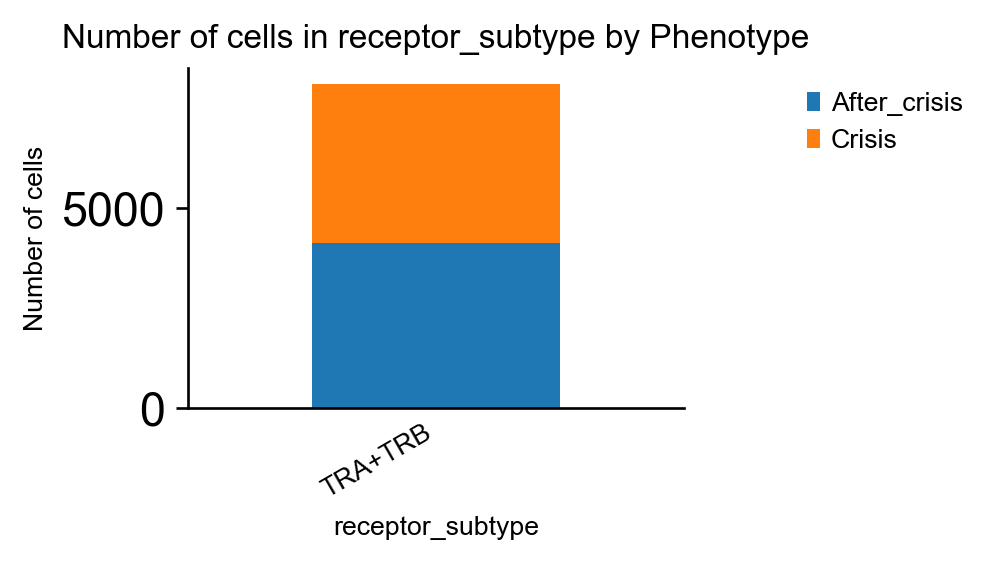

In [8]:
ir.tl.chain_qc(adata_MC_TCR)
ax = ir.pl.group_abundance(adata_MC_TCR, groupby="receptor_subtype", target_col="Phenotype")

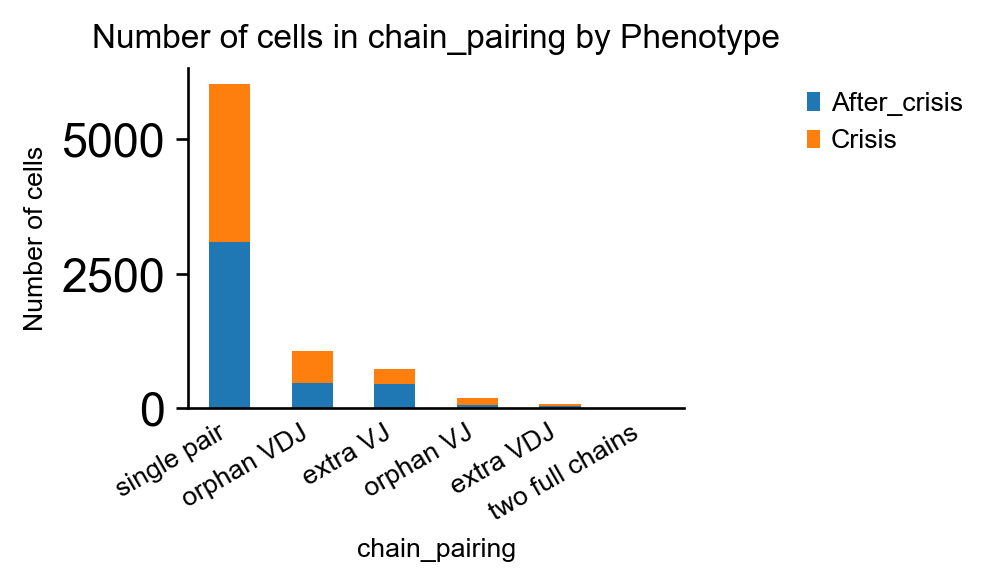

In [9]:
ax = ir.pl.group_abundance(adata_MC_TCR, groupby="chain_pairing", target_col="Phenotype")

In [10]:
adata_MC_TCR = adata_MC_TCR[~adata_MC_TCR.obs["chain_pairing"].isin(["orphan VDJ", "orphan VJ"]), :].copy()
adata_MC_TCR

AnnData object with n_obs × n_vars = 6845 × 0
    obs: 'is_cell', 'high_confidence', 'multi_chain', 'extra_chains', 'IR_VJ_1_c_call', 'IR_VJ_2_c_call', 'IR_VDJ_1_c_call', 'IR_VDJ_2_c_call', 'IR_VJ_1_consensus_count', 'IR_VJ_2_consensus_count', 'IR_VDJ_1_consensus_count', 'IR_VDJ_2_consensus_count', 'IR_VJ_1_d_call', 'IR_VJ_2_d_call', 'IR_VDJ_1_d_call', 'IR_VDJ_2_d_call', 'IR_VJ_1_duplicate_count', 'IR_VJ_2_duplicate_count', 'IR_VDJ_1_duplicate_count', 'IR_VDJ_2_duplicate_count', 'IR_VJ_1_j_call', 'IR_VJ_2_j_call', 'IR_VDJ_1_j_call', 'IR_VDJ_2_j_call', 'IR_VJ_1_junction', 'IR_VJ_2_junction', 'IR_VDJ_1_junction', 'IR_VDJ_2_junction', 'IR_VJ_1_junction_aa', 'IR_VJ_2_junction_aa', 'IR_VDJ_1_junction_aa', 'IR_VDJ_2_junction_aa', 'IR_VJ_1_locus', 'IR_VJ_2_locus', 'IR_VDJ_1_locus', 'IR_VDJ_2_locus', 'IR_VJ_1_productive', 'IR_VJ_2_productive', 'IR_VDJ_1_productive', 'IR_VDJ_2_productive', 'IR_VJ_1_v_call', 'IR_VJ_2_v_call', 'IR_VDJ_1_v_call', 'IR_VDJ_2_v_call', 'has_ir', 'Phenotype', 'donor_id

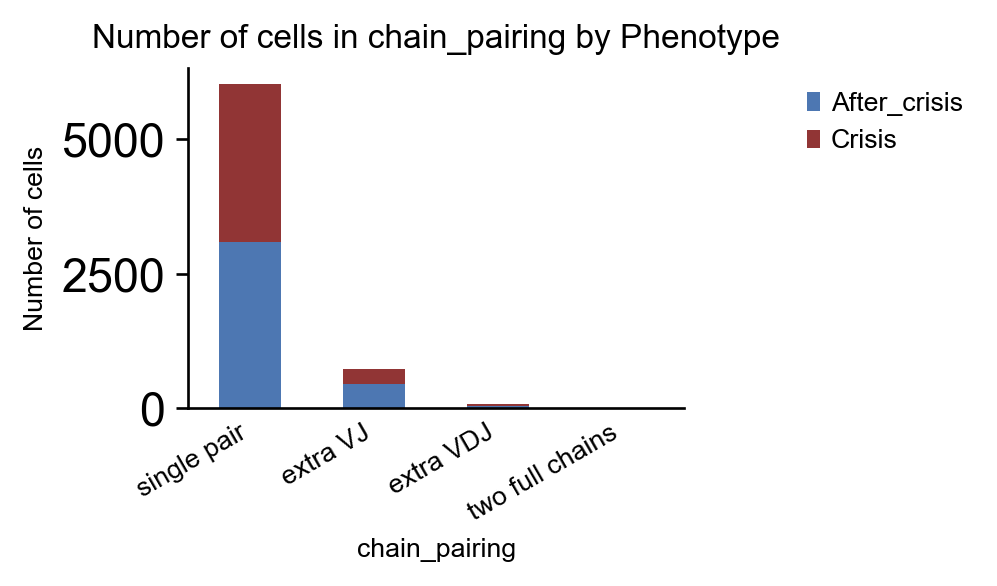

In [11]:
ax = ir.pl.group_abundance(adata_MC_TCR, groupby="chain_pairing", target_col="Phenotype", color=['#4d77b2', '#913535'])
#ax.get_figure().savefig("TCR1.pdf")

# Define clonotypes

In [12]:
ir.pp.ir_dist(adata_MC_TCR)
ir.tl.define_clonotypes(adata_MC_TCR, receptor_arms="all", dual_ir="primary_only")

Computing sequence x sequence distance matrix for VJ sequences.
Computing sequence x sequence distance matrix for VDJ sequences.
Initializing lookup tables. 
Computing clonotype x clonotype distances.
NB: Computation happens in chunks. The progressbar only advances when a chunk has finished. 


100%|██████████| 4598/4598 [00:21<00:00, 216.56it/s]


Stored clonal assignments in `adata.obs["clone_id"]`.


<AxesSubplot: >

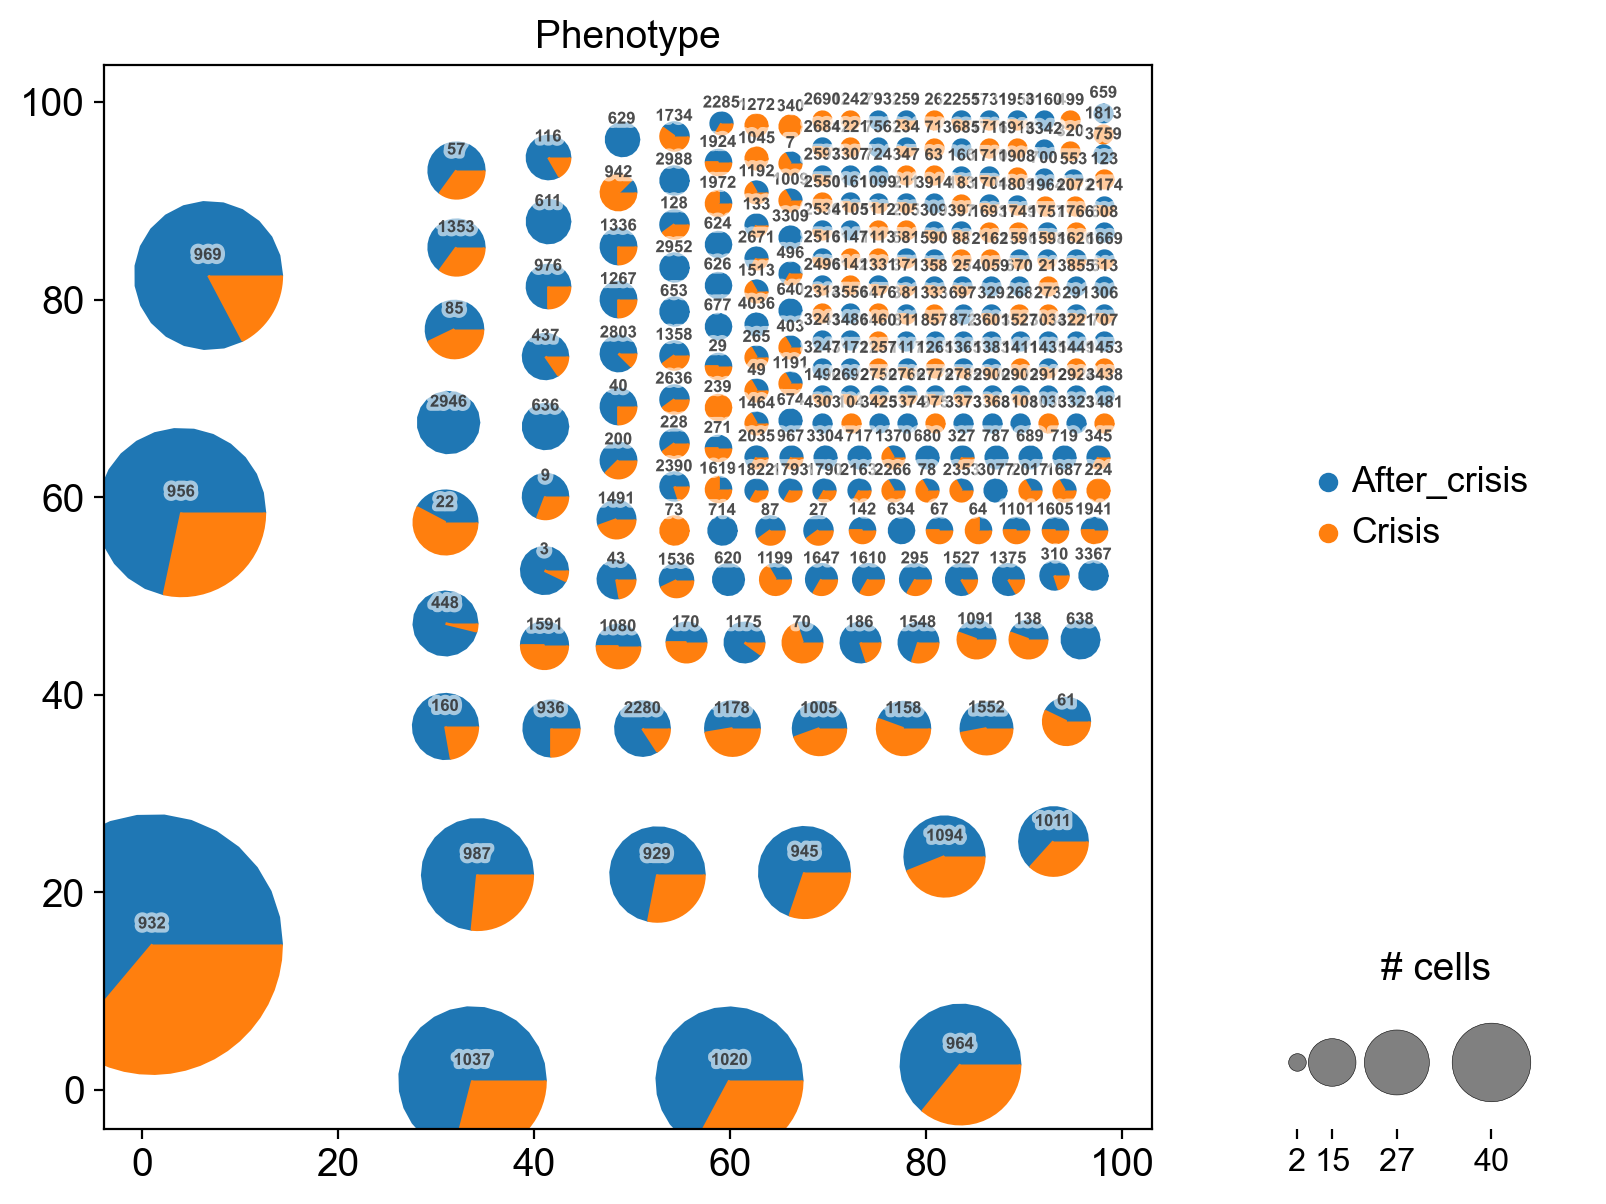

In [13]:
ir.tl.clonotype_network(adata_MC_TCR, min_cells=2)

ir.pl.clonotype_network(
    adata_MC_TCR, color="Phenotype", base_size=20, label_fontsize=6, panel_size=(7, 7)
)

## Top 3 expending clonotypes

In [14]:
adata_MC_TCR_top = adata_MC_TCR[adata_MC_TCR.obs["clone_id"].isin(['932', '956', '969'])].obs
adata_MC_TCR_top.to_csv('./write/TCR_top.csv')
adata_MC_TCR_top

,is_cell,high_confidence,multi_chain,extra_chains,IR_VJ_1_c_call,IR_VJ_2_c_call,IR_VDJ_1_c_call,IR_VDJ_2_c_call,IR_VJ_1_consensus_count,IR_VJ_2_consensus_count,...,Phenotype,donor_id,batch,Minor_cluster,Sample,receptor_type,receptor_subtype,chain_pairing,clone_id,clone_id_size
AAACGGGGTGCTTCTC-2,True,True,False,[],TRAC,NaN,TRBC2,NaN,13506.0,NaN,...,Crisis,patient_2,2,CD4 Temra (Th1),patient_2_Crisis,TCR,TRA+TRB,single pair,932,432
AACCATGCAGGAATCG-2,True,True,False,[],TRAC,NaN,TRBC2,NaN,5338.0,NaN,...,Crisis,patient_2,2,CD4 Temra (Th1),patient_2_Crisis,TCR,TRA+TRB,single pair,932,432
AACGTTGCATAAAGGT-2,True,True,False,[],TRAC,NaN,TRBC2,NaN,5820.0,NaN,...,Crisis,patient_2,2,CD4 Temra (Th1),patient_2_Crisis,TCR,TRA+TRB,single pair,932,432
AACGTTGTCAGCTTAG-2,True,True,False,[],TRAC,TRAC,TRBC2,NaN,25894.0,15774.0,...,Crisis,patient_2,2,CD4 Tem (Th1),patient_2_Crisis,TCR,TRA+TRB,extra VJ,956,180
AACTCCCGTCTCTCGT-2,True,True,False,[],TRAC,NaN,TRBC2,NaN,13458.0,NaN,...,Crisis,patient_2,2,CD8 Tem,patient_2_Crisis,TCR,TRA+TRB,single pair,969,139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTATGCGTAGTACCT-3,True,True,False,[],TRAC,NaN,TRBC2,NaN,130.0,NaN,...,After_crisis,patient_2,3,CD4 Temra (Th1),patient_2_After_crisis,TCR,TRA+TRB,single pair,932,432
TTTCCTCGTCTCTTTA-3,True,True,False,[],TRAC,NaN,TRBC2,NaN,5198.0,NaN,...,After_crisis,patient_2,3,CD4 Temra (Th1),patient_2_After_crisis,TCR,TRA+TRB,single pair,932,432
TTTGCGCTCTAACGGT-3,True,True,False,[],TRAC,NaN,TRBC2,NaN,1380.0,NaN,...,After_crisis,patient_2,3,CD4 Temra (Th1),patient_2_After_crisis,TCR,TRA+TRB,single pair,932,432
TTTGGTTGTGGGTCAA-3,True,True,False,[],TRAC,NaN,TRBC2,NaN,8432.0,NaN,...,After_crisis,patient_2,3,CD4 Temra (Th1),patient_2_After_crisis,TCR,TRA+TRB,single pair,932,432


meta NOT subset; don't know how to subset; dropped


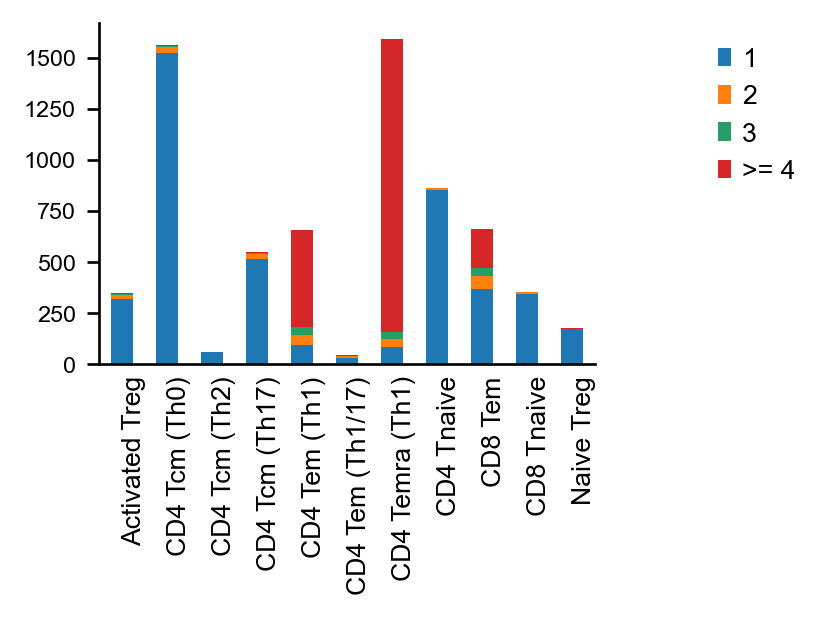

In [15]:
from matplotlib import pyplot as plt

sc.set_figure_params(dpi=200, color_map = 'viridis_r', figsize= [5, 5], fontsize=7, transparent=False, frameon=False)
ir.pl.clonal_expansion(adata_MC_TCR, groupby="Minor_cluster", clip_at=4, normalize=False)
plt.xticks(rotation = 90, rotation_mode = 'anchor', ha = 'right')
plt.savefig('TCR2.pdf')

meta NOT subset; don't know how to subset; dropped


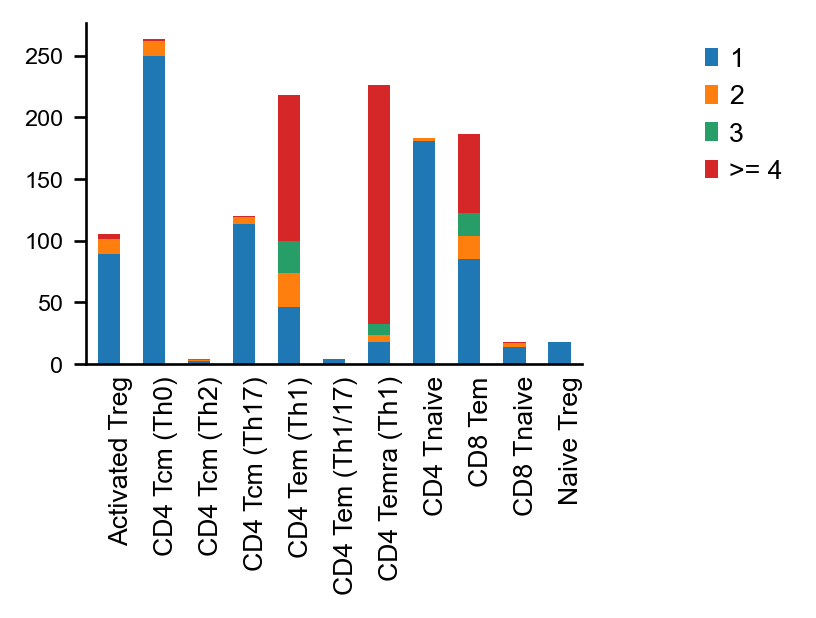

In [67]:
from matplotlib import pyplot as plt

adata_MC_TCR_P1 = adata_MC_TCR[adata_MC_TCR.obs['donor_id'] == 'patient_1']

sc.set_figure_params(dpi=200, color_map = 'viridis_r', figsize= [5, 5], fontsize=7, transparent=False, frameon=False)
ir.pl.clonal_expansion(adata_MC_TCR_P1, groupby="Minor_cluster", clip_at=4, normalize=False)
plt.xticks(rotation = 90, rotation_mode = 'anchor', ha = 'right')
plt.savefig('TCR2.pdf')

meta NOT subset; don't know how to subset; dropped


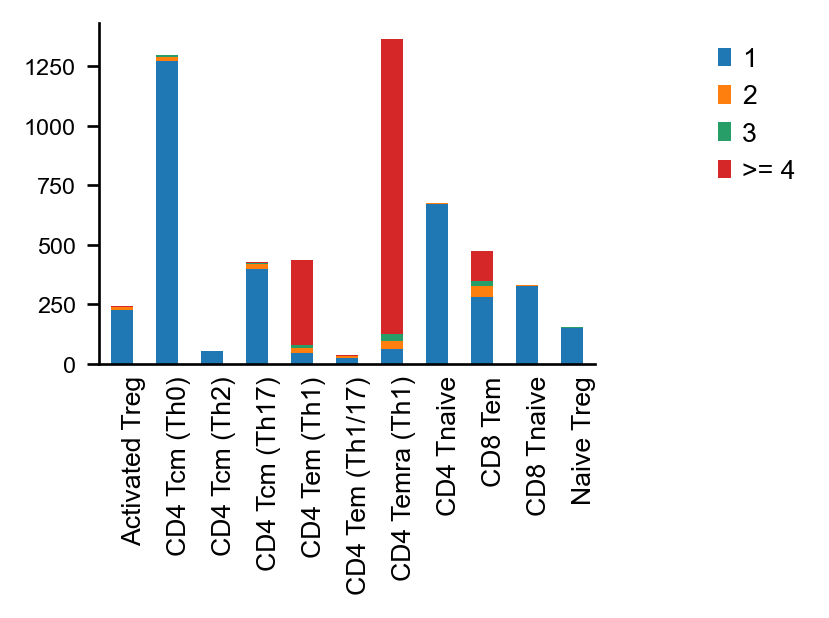

In [68]:
from matplotlib import pyplot as plt

adata_MC_TCR_P2 = adata_MC_TCR[adata_MC_TCR.obs['donor_id'] == 'patient_2']

sc.set_figure_params(dpi=200, color_map = 'viridis_r', figsize= [5, 5], fontsize=7, transparent=False, frameon=False)
ir.pl.clonal_expansion(adata_MC_TCR_P2, groupby="Minor_cluster", clip_at=4, normalize=False)
plt.xticks(rotation = 90, rotation_mode = 'anchor', ha = 'right')
plt.savefig('TCR2.pdf')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Activated Treg'),
  Text(1, 0, 'CD4 Tcm (Th0)'),
  Text(2, 0, 'CD4 Tcm (Th2)'),
  Text(3, 0, 'CD4 Tcm (Th17)'),
  Text(4, 0, 'CD4 Tem (Th1)'),
  Text(5, 0, 'CD4 Tem (Th1/17)'),
  Text(6, 0, 'CD4 Temra (Th1)'),
  Text(7, 0, 'CD4 Tnaive'),
  Text(8, 0, 'CD8 Tem'),
  Text(9, 0, 'CD8 Tnaive'),
  Text(10, 0, 'Naive Treg')])

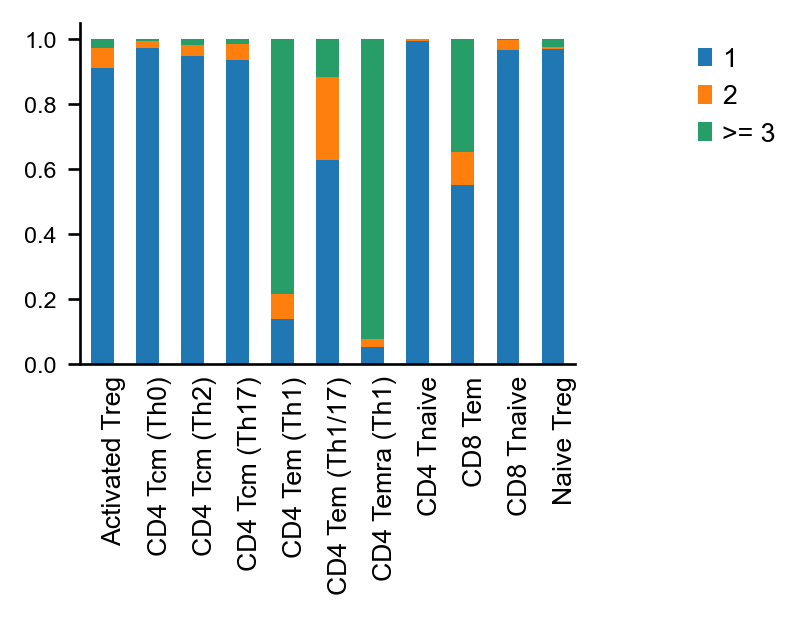

In [41]:
ir.pl.clonal_expansion(adata_MC_TCR, "Minor_cluster")
plt.xticks(rotation = 90, rotation_mode = 'anchor', ha = 'right')

# Clonotype abundance

meta NOT subset; don't know how to subset; dropped


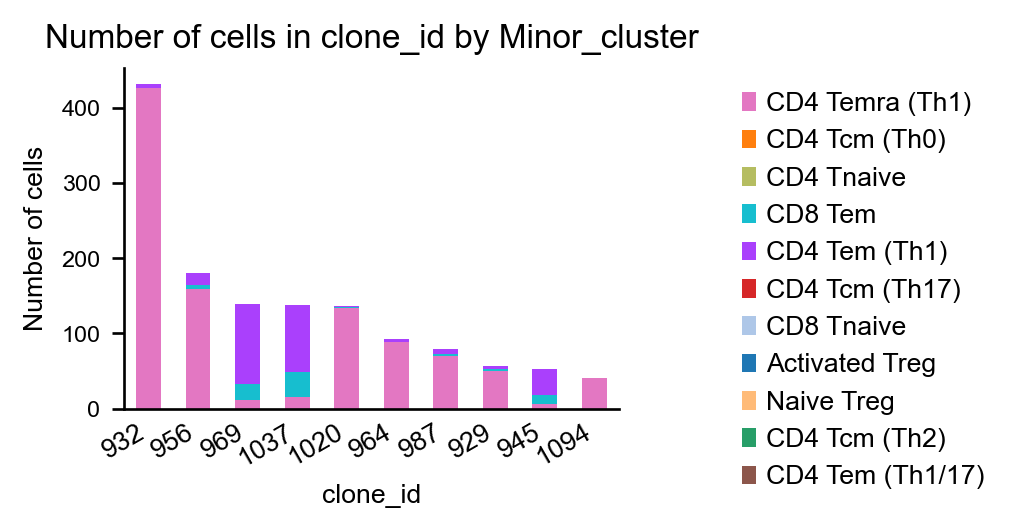

In [16]:
ir.pl.group_abundance(adata_MC_TCR, groupby="clone_id", target_col="Minor_cluster", max_cols=10)
plt.savefig('TCR4.pdf')

<AxesSubplot: title={'center': 'Fraction of Minor_cluster in each clone_id'}, xlabel='clone_id', ylabel='Fraction of cells in Sample'>

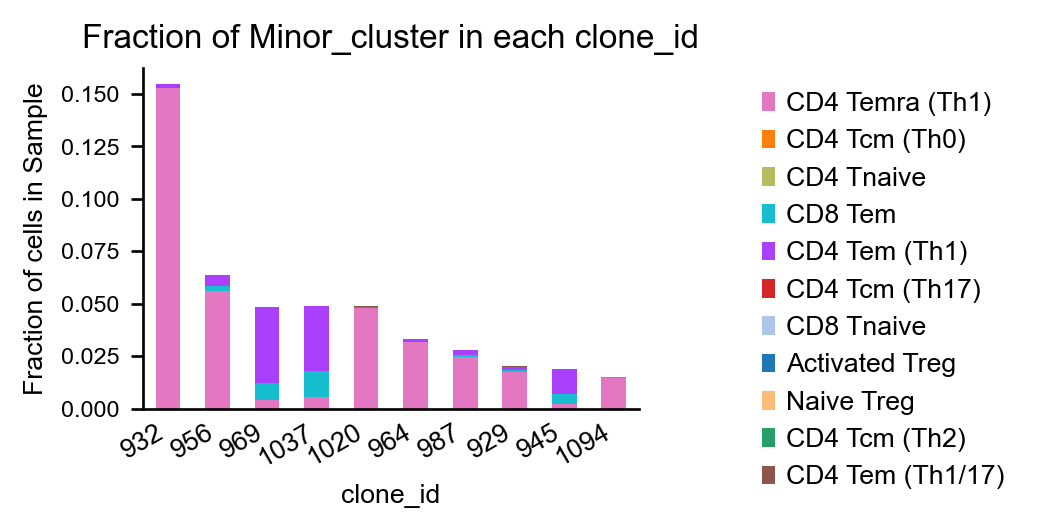

In [43]:
ir.pl.group_abundance(
    adata_MC_TCR, groupby="clone_id", target_col="Minor_cluster", max_cols=10, normalize="Sample"
)

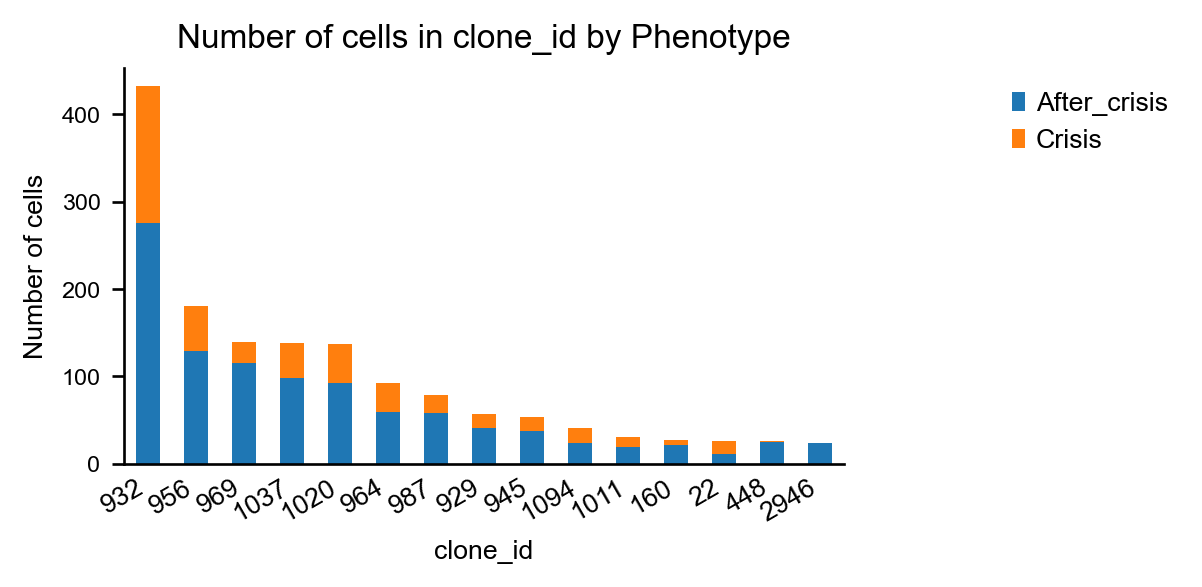

In [44]:
ax = ir.pl.group_abundance(
    adata_MC_TCR, groupby="clone_id", target_col="Phenotype", max_cols=15, figsize=(5, 3)
)

In [19]:
df = sc.get.obs_df(adata_MC_TCR, ['Minor_cluster','Phenotype', 'clone_id', 'clone_id_size'], use_raw=False)
df

,Minor_cluster,Phenotype,clone_id,clone_id_size
AAACCTGTCCCAAGTA-0,CD4 Tcm (Th0),Crisis,0,1
AAACGGGAGGCCGAAT-0,CD4 Tcm (Th17),Crisis,1,1
AAACGGGAGTCAATAG-0,Activated Treg,Crisis,2,1
AAACGGGGTGTTCTTT-0,CD4 Temra (Th1),Crisis,3,14
AAAGATGGTTACCAGT-0,Activated Treg,Crisis,4,1
...,...,...,...,...
TTTGGTTTCAGAGGTG-3,CD8 Tnaive,After_crisis,3759,2
TTTGTCAAGGTGGGTT-3,CD8 Tem,After_crisis,4594,1
TTTGTCACAAGAAGAG-3,Activated Treg,After_crisis,4595,1
TTTGTCAGTTATCCGA-3,CD4 Tcm (Th0),After_crisis,4596,1


In [20]:
df[(df['Minor_cluster'] == 'Activated Treg') & (df['Phenotype'] == 'After_crisis')]['clone_id'].unique()

['654', '687', '755', '767', '823', ..., '4459', '4500', '4565', '4592', '4595']
Length: 71
Categories (4598, object): ['0', '1', '2', '3', ..., '4594', '4595', '4596', '4597']

In [21]:
df_clone_unique = df.groupby(['Minor_cluster','Phenotype'])['clone_id'].nunique().reset_index()
df_clone_unique

,Minor_cluster,Phenotype,clone_id
0,Activated Treg,After_crisis,71
1,Activated Treg,Crisis,266
2,CD4 Tcm (Th0),After_crisis,751
3,CD4 Tcm (Th0),Crisis,804
4,CD4 Tcm (Th2),After_crisis,34
5,CD4 Tcm (Th2),Crisis,25
6,CD4 Tcm (Th17),After_crisis,214
7,CD4 Tcm (Th17),Crisis,325
8,CD4 Tem (Th1),After_crisis,158
9,CD4 Tem (Th1),Crisis,78


meta NOT subset; don't know how to subset; dropped


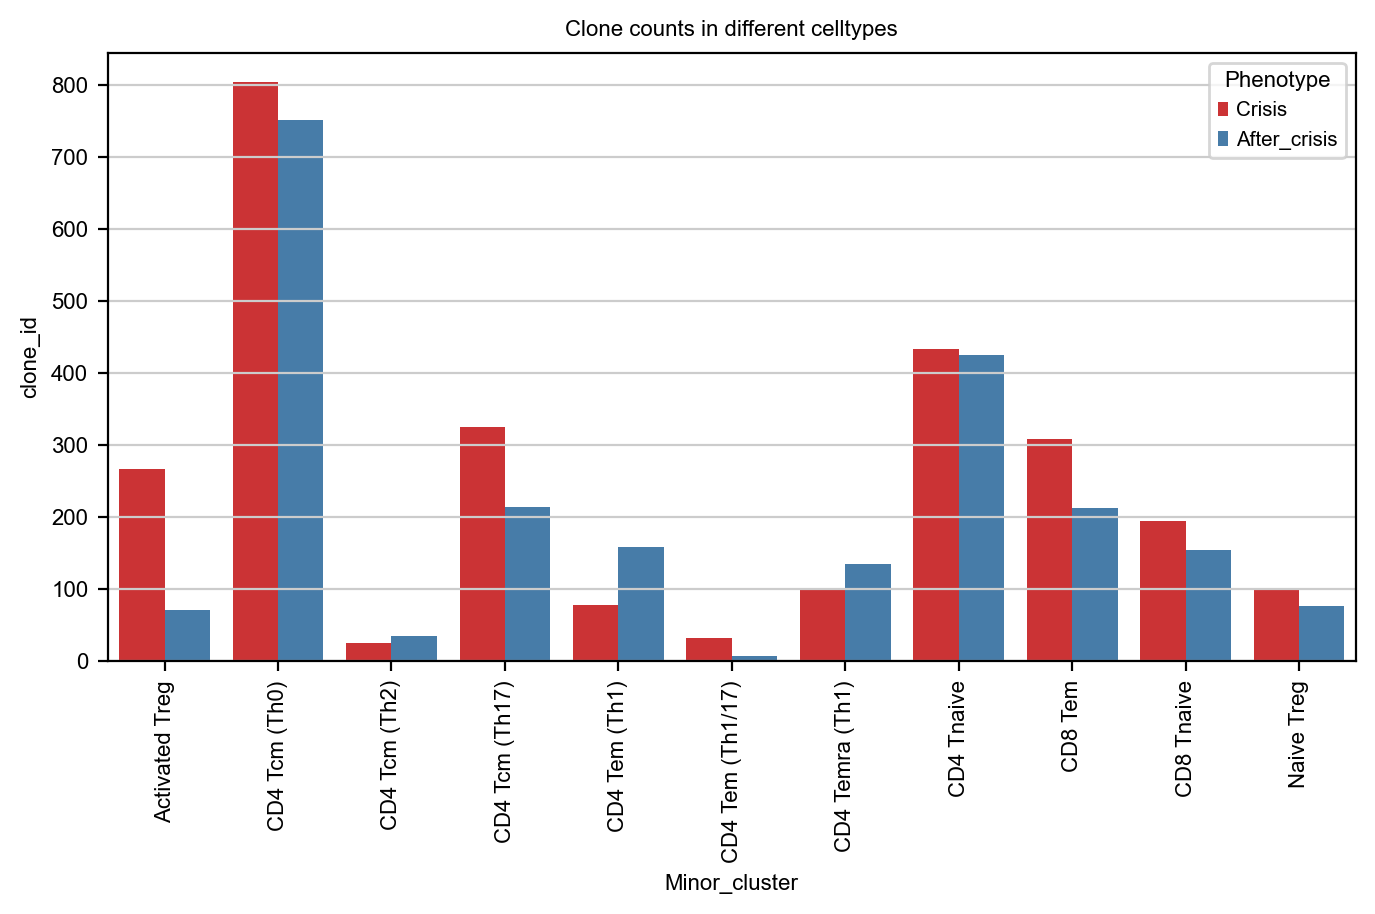

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
sc.set_figure_params(dpi=100, color_map = 'viridis_r', transparent=True, frameon=False, fontsize=8, figsize= [8, 4])


#sns.barplot(data=df2[(df2['variable'] == 'SRSF1') & (df2['Donor'] == 'patient_3') ], x="Minor_cluster", y="value", hue="Phenotype", errwidth=0.7)
sns.barplot(data=df_clone_unique, x="Minor_cluster", y="clone_id", hue="Phenotype", errwidth=0.7, hue_order= ['Crisis', 'After_crisis'],  palette="Set1").set(title='Clone counts in different celltypes')
plt.xticks(rotation=90)

plt.savefig('./figs/TCR3.pdf')

In [72]:
df = sc.get.obs_df(adata_MC_TCR, ['Minor_cluster','Phenotype', 'donor_id', 'clone_id', 'clone_id_size'], use_raw=False)
df_clone_unique_bypatient = df.groupby(['Minor_cluster','Phenotype', 'donor_id'])['clone_id'].nunique().reset_index()
df_clone_unique_bypatient

,Minor_cluster,Phenotype,donor_id,clone_id
0,Activated Treg,After_crisis,patient_1,9
1,Activated Treg,After_crisis,patient_2,62
2,Activated Treg,Crisis,patient_1,89
3,Activated Treg,Crisis,patient_2,177
4,CD4 Tcm (Th0),After_crisis,patient_1,126
5,CD4 Tcm (Th0),After_crisis,patient_2,625
6,CD4 Tcm (Th0),Crisis,patient_1,135
7,CD4 Tcm (Th0),Crisis,patient_2,669
8,CD4 Tcm (Th2),After_crisis,patient_1,0
9,CD4 Tcm (Th2),After_crisis,patient_2,34


meta NOT subset; don't know how to subset; dropped


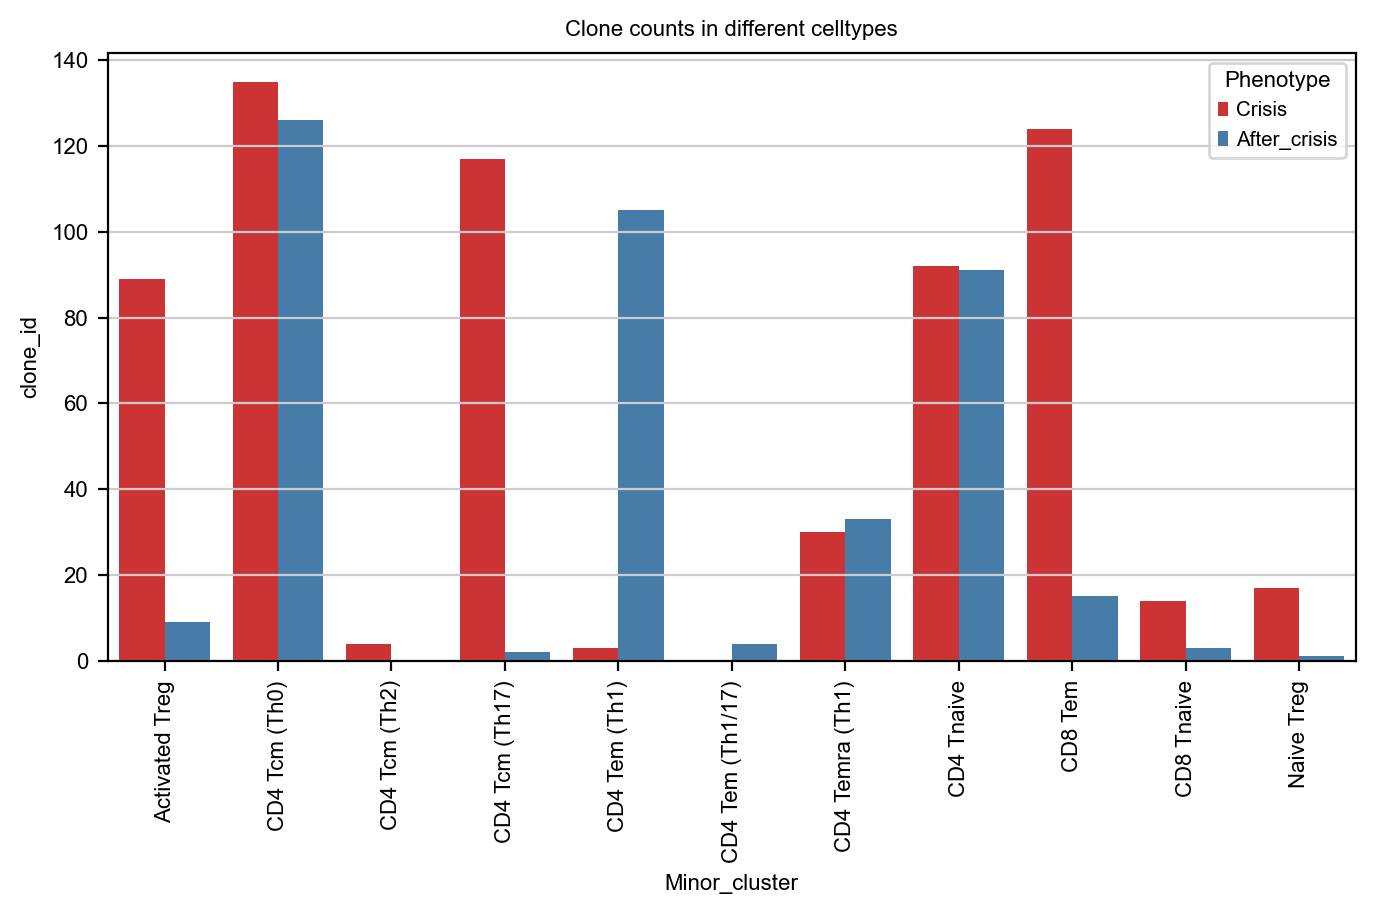

In [73]:
# Patient 1
import seaborn as sns
import matplotlib.pyplot as plt
sc.set_figure_params(dpi=100, color_map = 'viridis_r', transparent=True, frameon=False, fontsize=8, figsize= [8, 4])

df_clone_unique_P1 = df_clone_unique_bypatient[df_clone_unique_bypatient['donor_id'] == 'patient_1']

#sns.barplot(data=df2[(df2['variable'] == 'SRSF1') & (df2['Donor'] == 'patient_3') ], x="Minor_cluster", y="value", hue="Phenotype", errwidth=0.7)
sns.barplot(data=df_clone_unique_P1, x="Minor_cluster", y="clone_id", hue="Phenotype", errwidth=0.7, hue_order= ['Crisis', 'After_crisis'],  palette="Set1").set(title='Clone counts in different celltypes')
plt.xticks(rotation=90)

plt.savefig('TCR3.pdf')

meta NOT subset; don't know how to subset; dropped


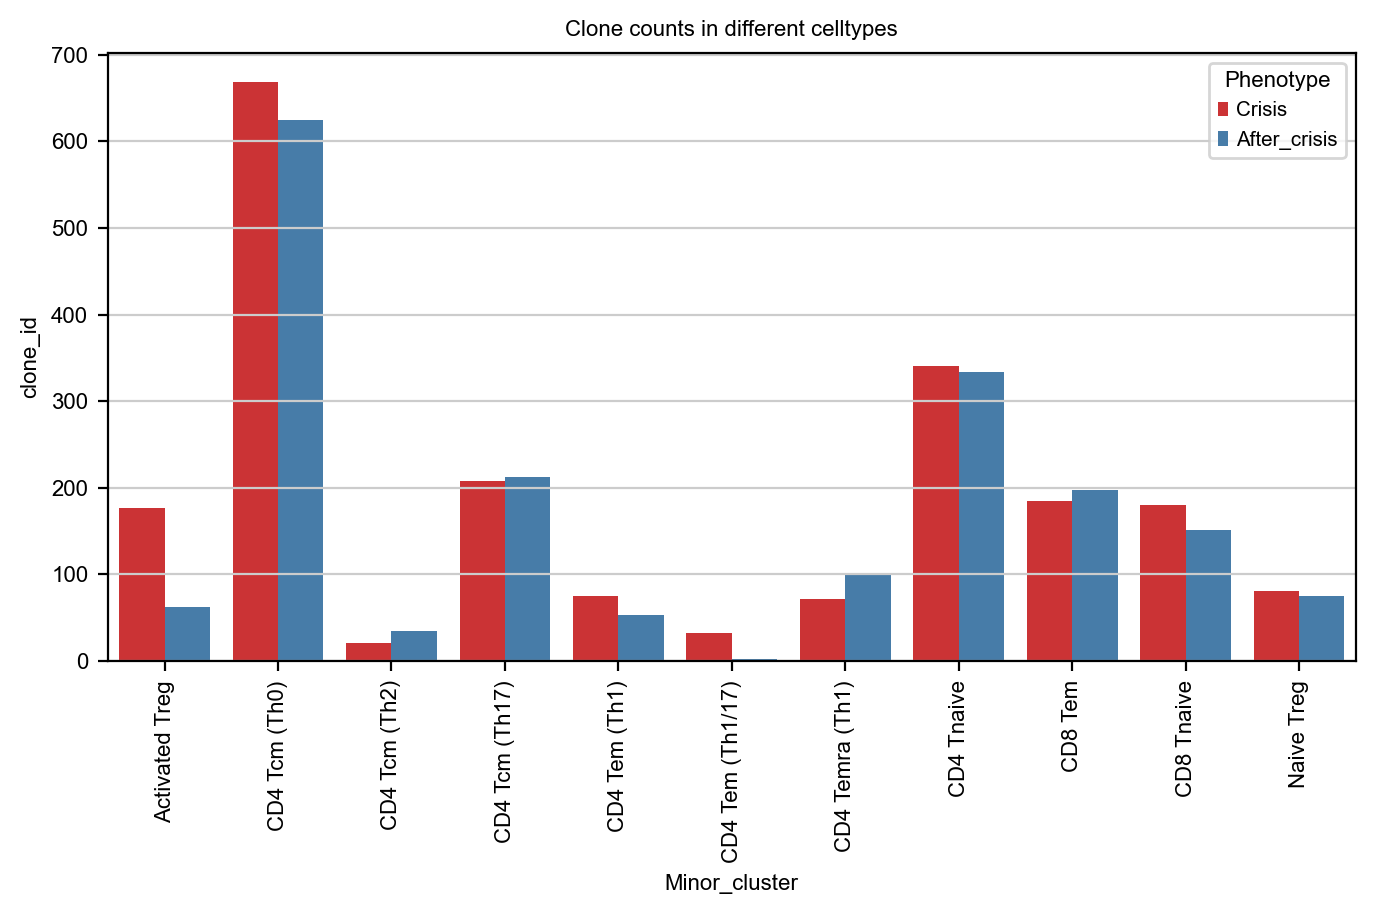

In [74]:
# Patient 2
import seaborn as sns
import matplotlib.pyplot as plt
sc.set_figure_params(dpi=100, color_map = 'viridis_r', transparent=True, frameon=False, fontsize=8, figsize= [8, 4])

df_clone_unique_P2 = df_clone_unique_bypatient[df_clone_unique_bypatient['donor_id'] == 'patient_2']


#sns.barplot(data=df2[(df2['variable'] == 'SRSF1') & (df2['Donor'] == 'patient_3') ], x="Minor_cluster", y="value", hue="Phenotype", errwidth=0.7)
sns.barplot(data=df_clone_unique_P2, x="Minor_cluster", y="clone_id", hue="Phenotype", errwidth=0.7, hue_order= ['Crisis', 'After_crisis'],  palette="Set1").set(title='Clone counts in different celltypes')
plt.xticks(rotation=90)

plt.savefig('TCR3.pdf')

## None clone_id was present in all samples

In [53]:
adata_MC_TCR.obs.Sample.unique()

['patient_1_Crisis', 'patient_1_After_crisis', 'patient_2_Crisis', 'patient_2_After_crisis']
Categories (4, object): ['patient_1_After_crisis', 'patient_1_Crisis', 'patient_2_After_crisis', 'patient_2_Crisis']

In [65]:
samples = ['patient_1_After_crisis', 'patient_2_After_crisis', 'patient_1_Crisis',  'patient_2_Crisis', ]

def present_in_all_samples(group):
    return set(group['Sample'].unique()) == set(samples)

adata_MC_TCR_intersect = adata_MC_TCR.obs.groupby('clone_id').filter(present_in_all_samples)
adata_MC_TCR_intersect


,is_cell,high_confidence,multi_chain,extra_chains,IR_VJ_1_c_call,IR_VJ_2_c_call,IR_VDJ_1_c_call,IR_VDJ_2_c_call,IR_VJ_1_consensus_count,IR_VJ_2_consensus_count,...,Phenotype,donor_id,batch,Minor_cluster,Sample,receptor_type,receptor_subtype,chain_pairing,clone_id,clone_id_size


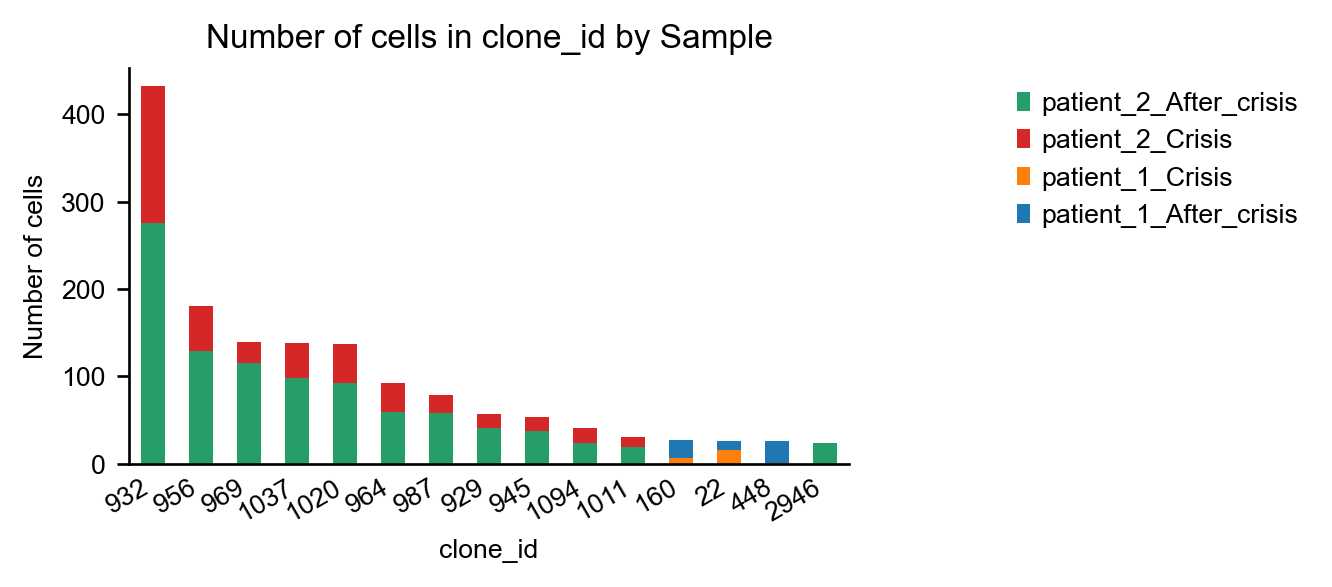

In [51]:
ax = ir.pl.group_abundance(
    adata_MC_TCR, groupby="clone_id", target_col="Sample", max_cols=15, figsize=(5, 3)
)

# Gene usage

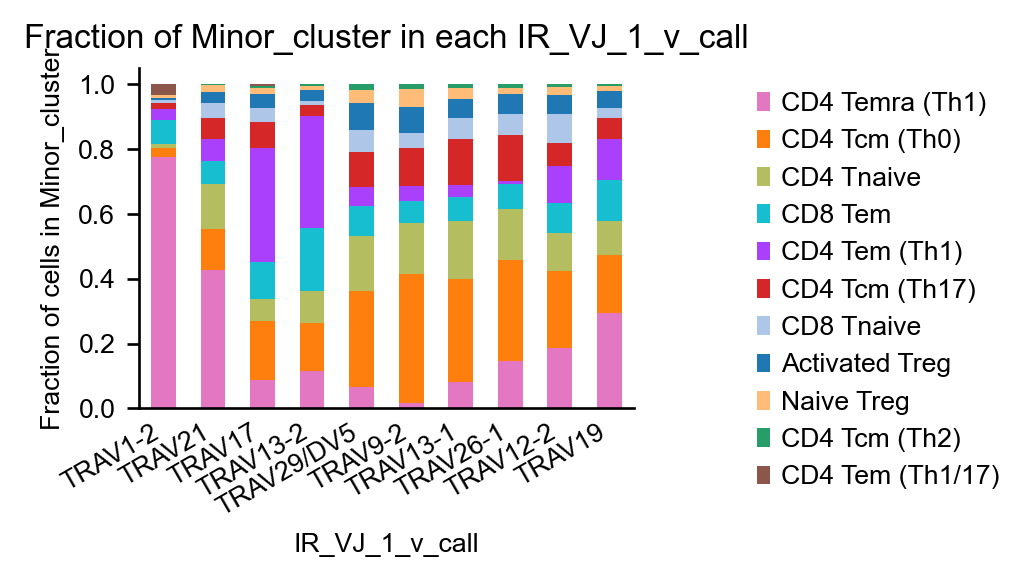

In [75]:
ax = ir.pl.group_abundance(
    adata_MC_TCR, groupby="IR_VJ_1_v_call", target_col="Minor_cluster", normalize=True, max_cols=10
)

meta NOT subset; don't know how to subset; dropped


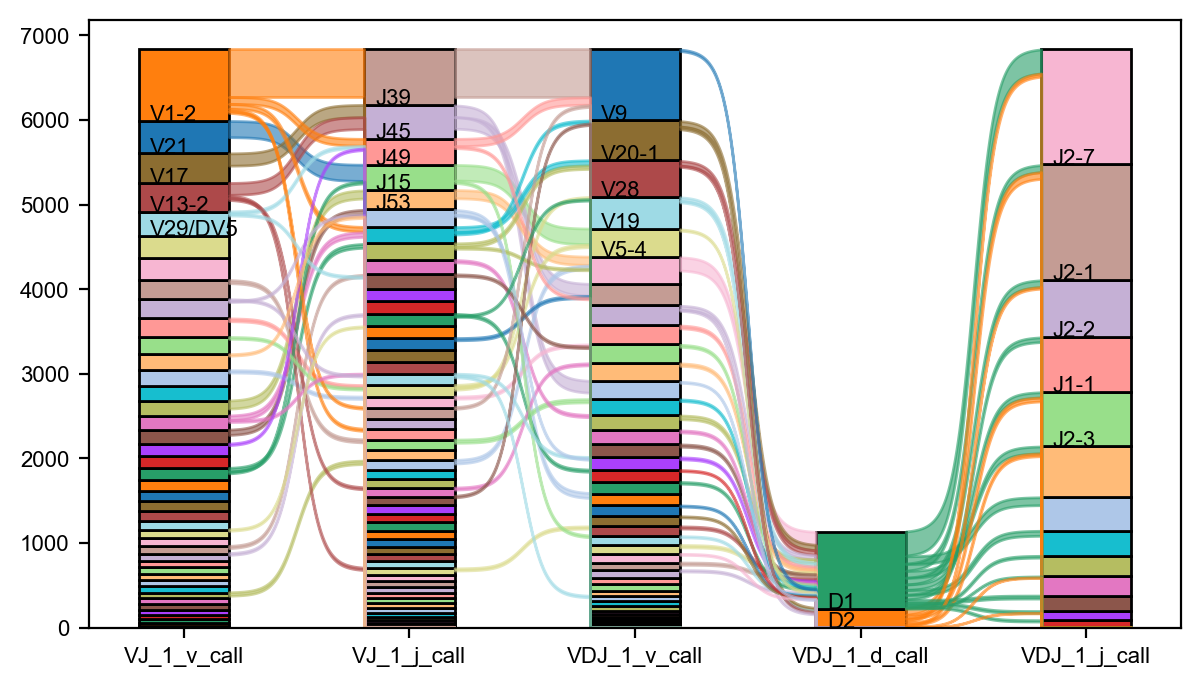

In [76]:
ax = ir.pl.vdj_usage(adata_MC_TCR, full_combination=False, max_segments=None, max_ribbons=30)
ax.get_figure().savefig("TCR4.pdf")